In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df = pd.read_csv("again.csv")

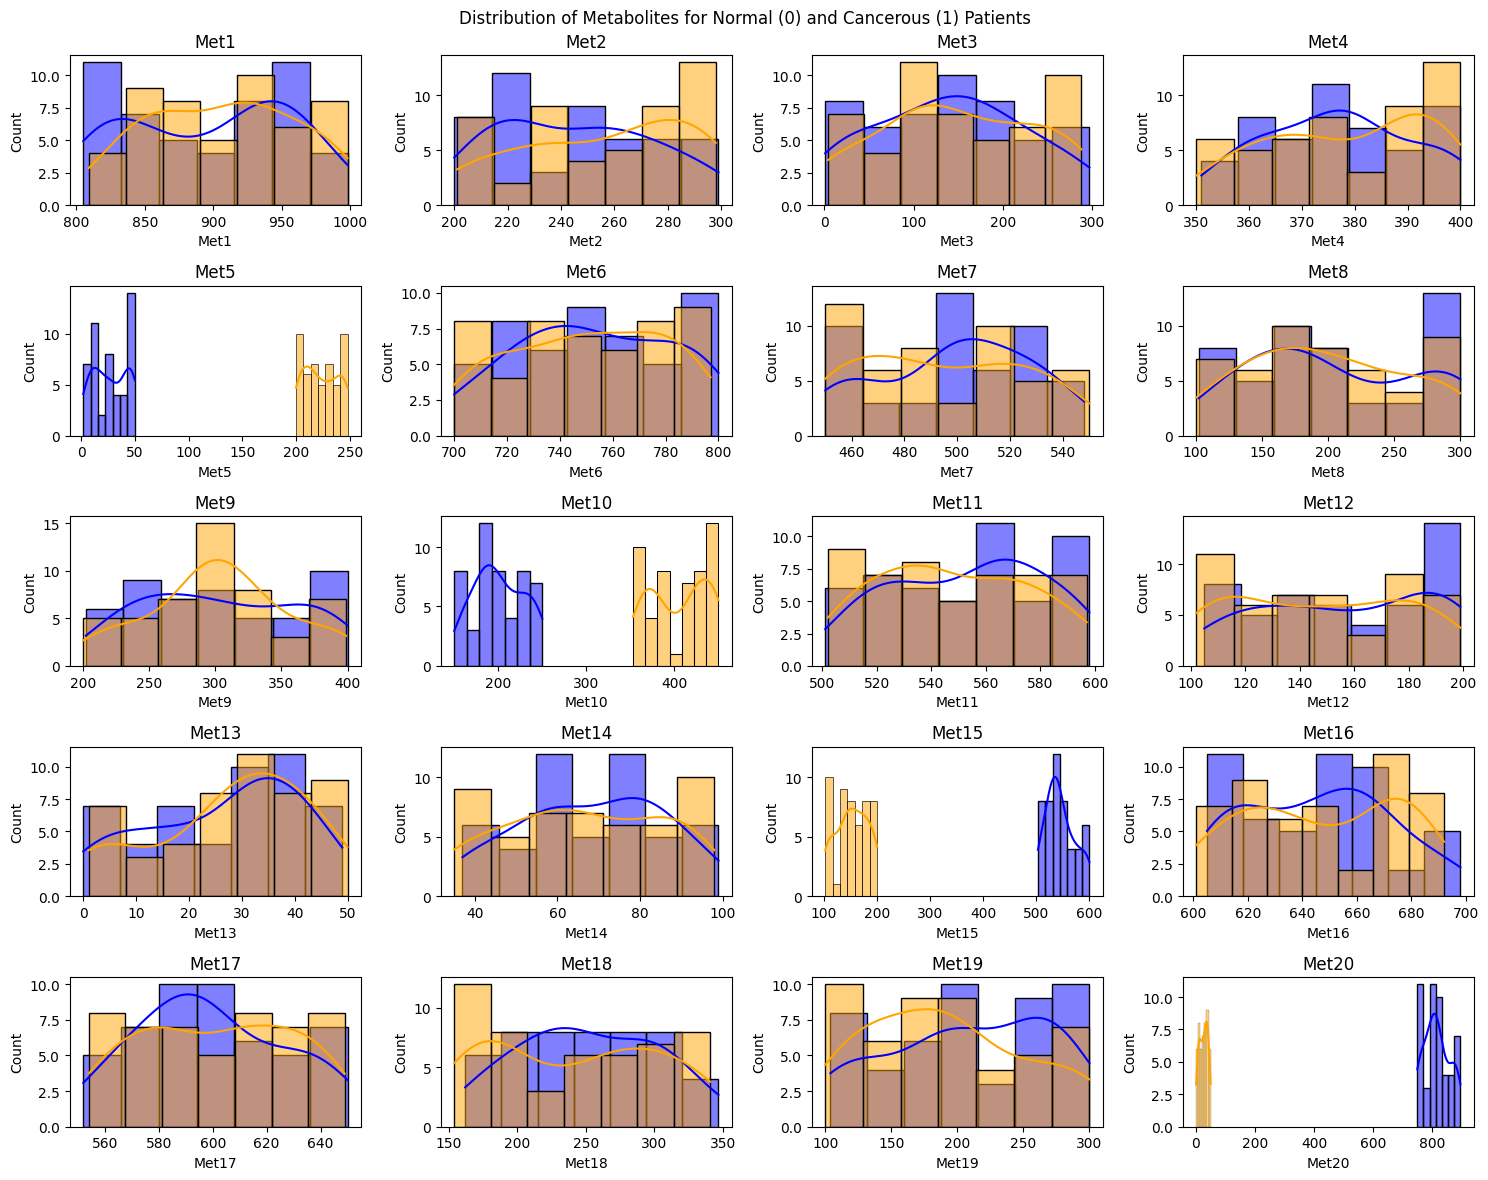

In [5]:
# Separate data for normal and cancerous patients
normal_data = df[df['Label'] == 0]
cancerous_data = df[df['Label'] == 1]

# Visualize the distribution of each metabolite for normal and cancerous patients
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))
fig.suptitle('Distribution of Metabolites for Normal (0) and Cancerous (1) Patients')

for i, ax in enumerate(axes.flatten()):
    metabolite_column = f'Met{i + 1}'
    sns.histplot(normal_data[metabolite_column], label='Normal', kde=True, color='blue', ax=ax)
    sns.histplot(cancerous_data[metabolite_column], label='Cancerous', kde=True, color='orange', ax=ax)
    ax.set_title(metabolite_column)

plt.tight_layout()
plt.show()

In [ ]:
X_all = df.drop(['Samples', 'Label'], axis=1)
y = df['Label']

In [ ]:
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)

scaler_all = StandardScaler()
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_test_all_scaled = scaler_all.transform(X_test_all)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_all_scaled, y_train)

    # Make predictions
    y_pred_all = model.predict(X_test_all_scaled)

    # Evaluate the model
    accuracy_all = accuracy_score(y_test, y_pred_all)
    report_all = classification_report(y_test, y_pred_all)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_all:.2f}")
    print("Classification Report:\n", report_all)


Model: Random Forest
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Model: Gradient Boosting
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Model: Logistic Regression
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00    

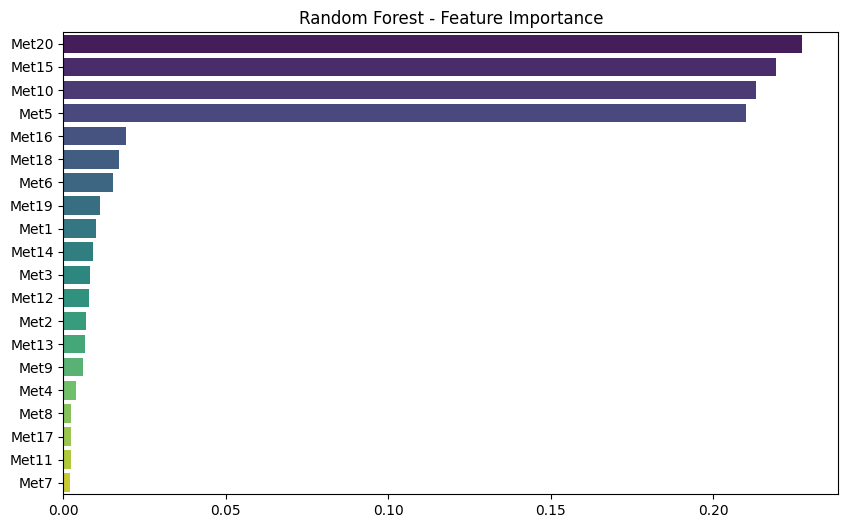

In [ ]:
# Random Forest feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_all_scaled, y_train)

feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X_all.columns)
feature_importance_rf.sort_values(ascending=False, inplace=True)

# Plot or print feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_rf.values, y=feature_importance_rf.index, orient='h', palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.show()

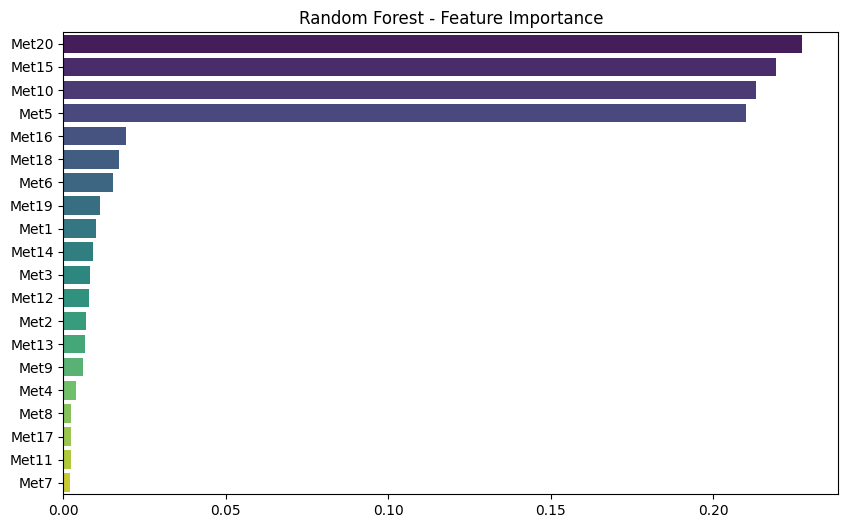

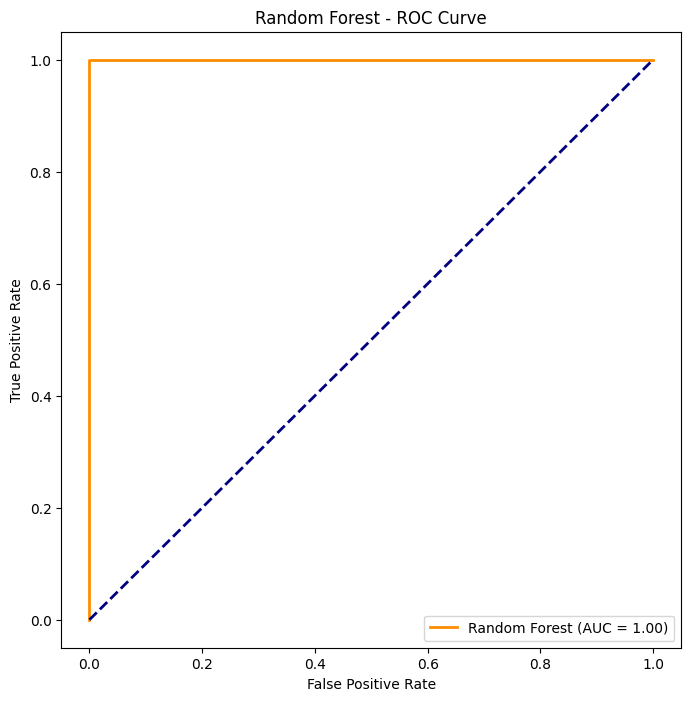

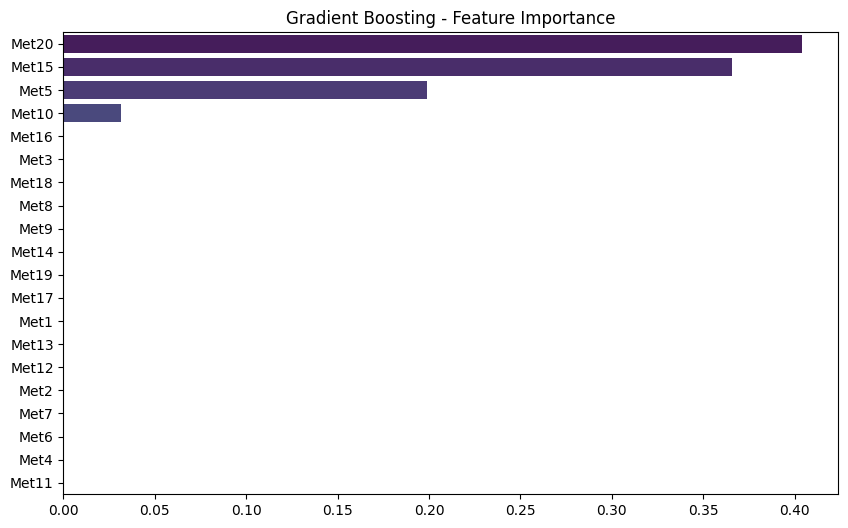

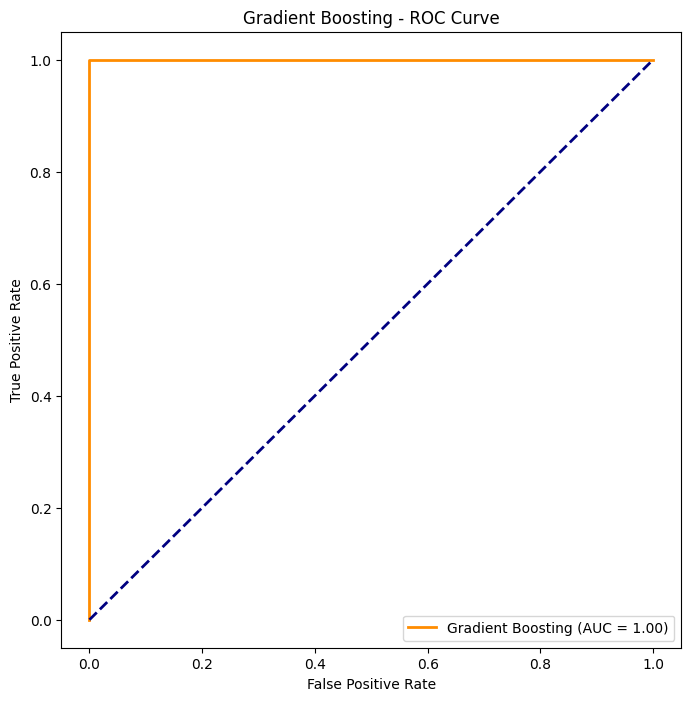

Logistic Regression does not have feature_importances_ attribute.


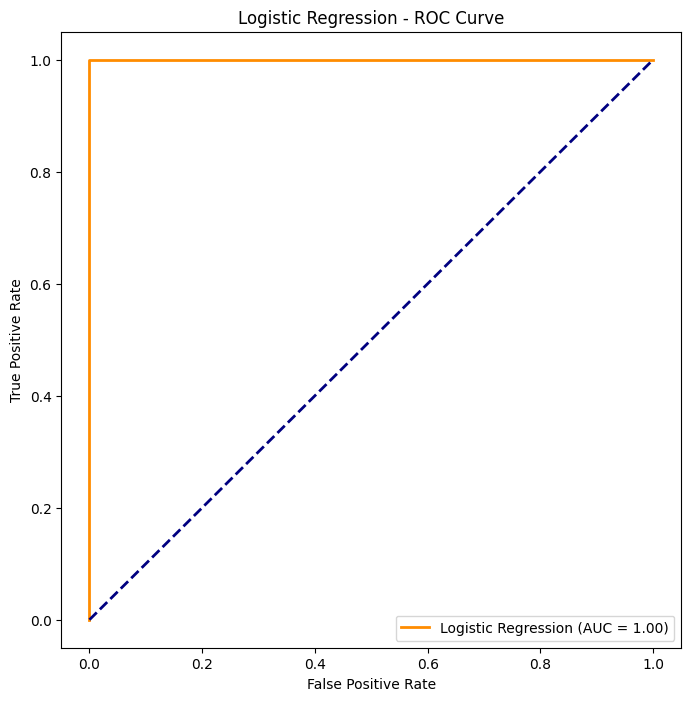

Support Vector Machine does not have feature_importances_ attribute.


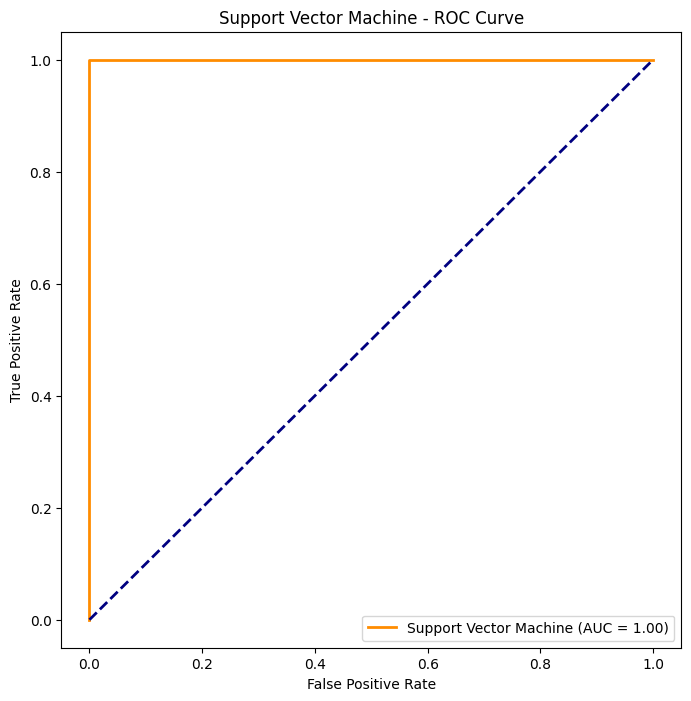

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))
}

# Plot feature importance and ROC curve for each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_all_scaled, y_train)

    # Feature importance (if available)
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.Series(model.feature_importances_, index=X_all.columns)
        feature_importance.sort_values(ascending=False, inplace=True)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importance.values, y=feature_importance.index, orient='h', palette='viridis')
        plt.title(f'{model_name} - Feature Importance')
        plt.show()
    else:
        print(f'{model_name} does not have feature_importances_ attribute.')

    # ROC Curve
    y_score = model.predict_proba(X_test_all_scaled)

    # For binary classification (assuming you have only two classes)
    if len(np.unique(y)) == 2:
        fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print(f'{model_name} ROC curve is not applicable for multi-class classification.')

# Note: If you have more than two classes, the ROC curve visualization may vary depending on the method used (micro, macro, or one-vs-all).


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_all_scaled, y_train)

# Get coefficients and intercept
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

# Display coefficients and intercept
print(f'Intercept: {intercept:.4f}')
for feature, coef in zip(X_all.columns, coefficients):
    print(f'{feature}: {coef:.4f}')


Intercept: 0.2972
Met1: 0.0956
Met2: 0.1113
Met3: 0.0861
Met4: 0.0069
Met5: 1.0541
Met6: -0.0755
Met7: 0.0234
Met8: -0.0338
Met9: -0.0406
Met10: 0.9803
Met11: -0.0586
Met12: -0.1048
Met13: -0.0621
Met14: -0.0270
Met15: -1.0575
Met16: -0.0312
Met17: 0.0001
Met18: -0.0847
Met19: -0.0860
Met20: -1.0767


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_all_scaled = scaler.fit_transform(X_train_all)
X_test_all_scaled = scaler.transform(X_test_all)

# Create and fit a linear SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_all_scaled, y_train)

# Get coefficients and intercept
coefficients = svm_model.coef_.ravel()
intercept = svm_model.intercept_[0]

# Display coefficients and intercept
print(f'Intercept: {intercept:.4f}')
for feature, coef in zip(X_all.columns, coefficients):
    print(f'{feature}: {coef:.4f}')

Intercept: 0.0692
Met1: 0.0011
Met2: -0.0013
Met3: 0.0296
Met4: 0.0042
Met5: 0.2918
Met6: 0.0111
Met7: 0.0183
Met8: 0.0054
Met9: -0.0256
Met10: 0.2033
Met11: -0.0031
Met12: -0.0229
Met13: -0.0018
Met14: 0.0111
Met15: -0.2935
Met16: 0.0119
Met17: 0.0004
Met18: 0.0141
Met19: 0.0038
Met20: -0.3170


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed your data (X_all)

# Transpose the data to cluster similar types of attributes
X_all_transposed = X_all.T

# Standardize the features (important for GMM)
scaler = StandardScaler()
X_all_transposed_scaled = scaler.fit_transform(X_all_transposed)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_all_transposed_scaled)

# Predict cluster labels for attributes
attribute_cluster_labels = gmm.predict(X_all_transposed_scaled)

# Add cluster labels to the transposed data
X_all_transposed_clustered = X_all_transposed.copy()
X_all_transposed_clustered['Cluster'] = attribute_cluster_labels

# Visualize the clusters
sns.pairplot(X_all_transposed_clustered, hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()
